# Reducto extraction from top 4000 pypi packages ordered by downloads 

### Data

The data extracted corresponds to the packages obtained from: https://hugovk.github.io/top-pypi-packages/,
to the last version of 4000 most downloaded packages from PyPI (obtained from the github repo: [top_pypi_packages](https://github.com/hugovk/top-pypi-packages/blob/master/top-pypi-packages-365-days.json))

from the total number of pacakges, 3647 packages are present:
- 353 failed:
    - 153 are discarded as the algorithm to obtain the package installed from the corresponding package failed.
        This may be if time is found for it.
        An example of this type is: [google-cloud-core](https://github.com/googleapis/python-cloud-core)
        Many google or azure packages failed in this category.
    - 123 installation issues, an example of this type would be: [pyobjc-framework-modelio](https://pypi.org/project/pyobjc-framework-ModelIO/), a library expected to be installed for macos (the code is run on an ubuntu machine).
    - 77 reducto issues, an example of this type: [kafka](https://pypi.org/project/kafka/), which contains source code from older python versions not suported by the ast parser used in *reducto* (python 3.8).

### Import visualization and features

In [7]:
import src.visualization.visualize as viz
import src.features.build_features as bf

### Descriptive statistics of reducto statistics obtained

In [8]:
reducto_table = bf.get_reducto_reports_table()
reducto_table.describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

,lines,source_lines,blank_lines,docstring_lines,comment_lines,average_function_length,number_of_functions,source_files
count,3.647000e+03,3.647000e+03,3647.000000,3647.000000,3647.000000,3647.000000,3647.000000,3647.000000
mean,1.402416e+04,9.545457e+03,1627.766109,2069.450233,781.485056,12.858514,534.454894,49.217987
std,8.349239e+04,5.984216e+04,9296.191124,18596.750779,3920.814374,40.615570,2418.541991,274.131266
min,1.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
5%,7.400000e+01,4.700000e+01,11.000000,0.000000,1.000000,2.000000,2.000000,1.000000
25%,4.505000e+02,3.015000e+02,65.000000,24.000000,14.000000,6.000000,21.000000,3.000000
50%,1.603000e+03,1.077000e+03,224.000000,135.000000,71.000000,9.000000,81.000000,8.000000
75%,6.487000e+03,4.250500e+03,827.000000,662.500000,323.500000,14.000000,290.000000,28.000000
95%,4.669150e+04,3.063410e+04,5737.300000,5314.000000,2853.400000,27.000000,1861.200000,163.700000
max,3.424155e+06,2.595086e+06,409215.000000,682666.000000,120610.000000,1562.000000,71735.000000,11315.000000


##### Insights of the descriptive stats

lkjh

#### Packages with the biggest values by field, removed as outliers

In [9]:
reducto_table.idxmax()  # Name of the packages with the highest number by field


lines                                    azure-mgmt-network
source_lines                             azure-mgmt-network
blank_lines                              azure-mgmt-network
docstring_lines            boto3-type-annotations-with-docs
comment_lines                            azure-mgmt-network
average_function_length                               js2py
number_of_functions                                     oci
source_files                                         plotly
dtype: object

In [10]:
reducto_table.max()  # Actual max values by field

lines                      3424155
source_lines               2595086
blank_lines                 409215
docstring_lines             682666
comment_lines               120610
average_function_length       1562
number_of_functions          71735
source_files                 11315
dtype: int64

<AxesSubplot:xlabel='lines', ylabel='Count'>

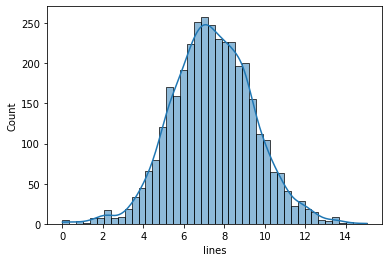

In [11]:
import numpy as np
log_lines = reducto_table['lines'].apply(np.log)
import seaborn as sns
sns.histplot(log_lines, kde=True)
#https://stackoverflow.com/questions/41940726/scipy-lognorm-fitting-to-histogram  # Review histplot

### Table without outliers:
##### Packages with less than a million lines of code and average function length less than 200 lines.
##### The columns for source_lines, blank_lines, docstring_lines, comment_lines are divided by the corresponding number of lines of each package.

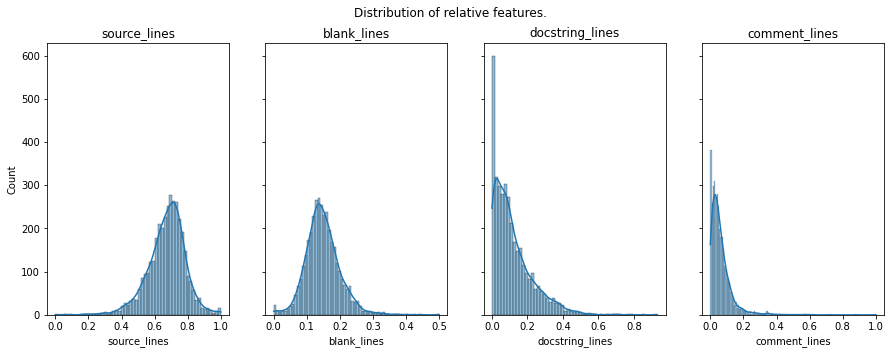

In [56]:
importlib.reload(viz)
viz.plot_histogram_relative_numbers()

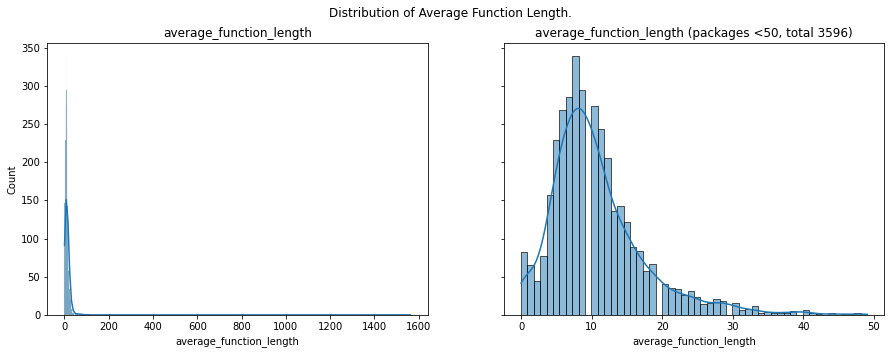

In [6]:
import importlib
importlib.reload(viz)
viz.plot_average_function_length()

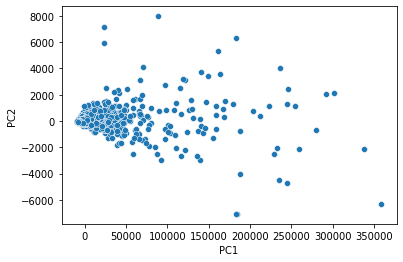

In [15]:
importlib.reload(bf)
importlib.reload(viz)
viz.plot_pcs()

#### Plot clusters

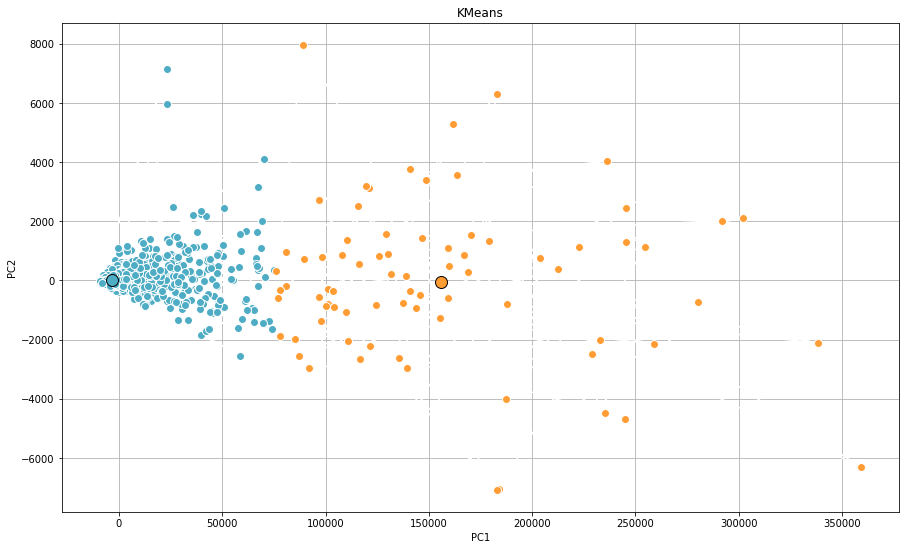

In [38]:
importlib.reload(bf)
importlib.reload(viz)
viz.plot_clusters(bf.get_pc(bf.get_reducto_reports_relative(), standardize=False))